### Calculate the Word Mover's Distance between two sentences

In [1]:
import gensim.downloader as api
import glob
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

sys.path.append("../../../../utils")
from absolute_path_builder import AbsolutePathBuilder

In [2]:
plt.rcParams['figure.figsize']  = (3.33, 5.5)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 24
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 3

### Read demographic groups' sentences

In [3]:
dataset = "buckeye_vs_coraal"
# dataset = "youtube"
# dataset = "twitter"

input_path = AbsolutePathBuilder.get_path(
    f"07_{dataset}_wmd",
    filepaths="../../../../config/filepaths.yaml"
)

In [4]:
dfs = [pd.read_csv(file) for file in glob.glob(os.path.join(input_path, "*"))]

In [5]:
df = pd.concat(dfs, ignore_index=False)

del dfs

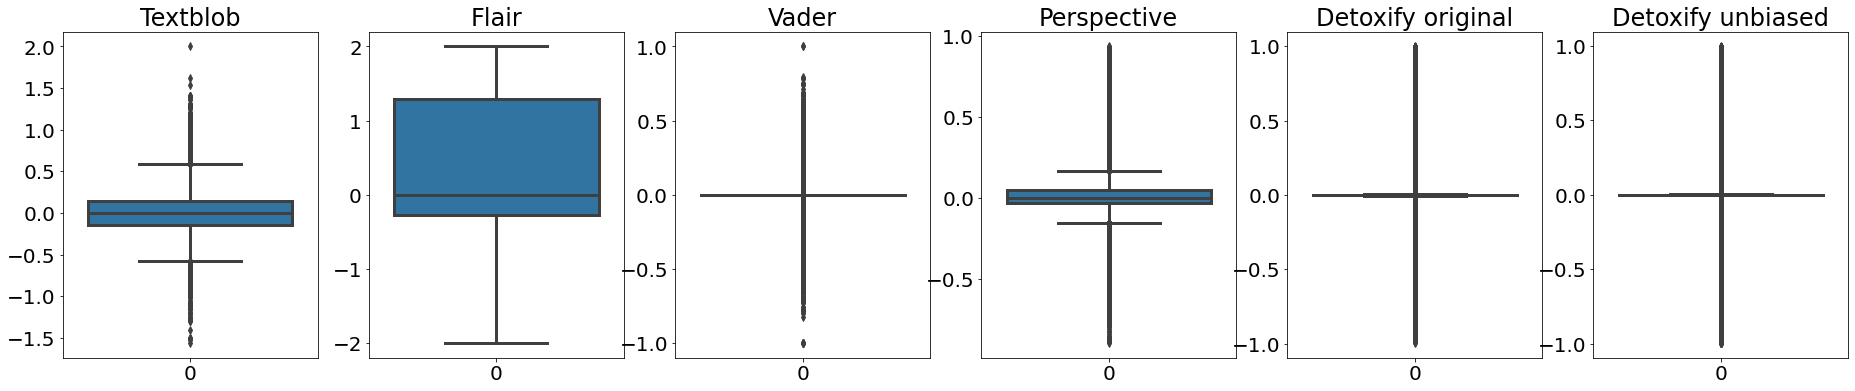

In [6]:
fig, axs = plt.subplots(1, 6, figsize=(32, 6))

for i, model in enumerate([
    "textblob",
    "flair",
    "vader",
    "perspective",
    "detoxify_original",
    "detoxify_unbiased",
]):
    df_tmp = df[["wmd", f"{model}_score_black", f"{model}_score"]].copy()
    df_tmp.loc[:, "diffs"] = df_tmp.loc[:, f"{model}_score_black"] - df_tmp.loc[:, f"{model}_score"]
    df_tmp = df_tmp.drop_duplicates(["wmd", "diffs"]).reset_index(drop=True)

    sns.boxplot(
        data=df_tmp.diffs,
        ax=axs[i],
    )
    axs[i].set_title(model.replace('_', ' ').capitalize())

plt.show()

In [7]:
score_cols = [col for col in df.columns if "score" in col] + ["wmd"]

df = df.dropna().reset_index(drop=True)
df.loc[:, score_cols] = df.loc[:, score_cols] * 1000
df.loc[:, score_cols] = df.loc[:, score_cols].astype(int)
df.loc[:, score_cols] = df.loc[:, score_cols] / 1000

df.head(3)

,text_black,perspective_score_black,flair_score_black,textblob_score_black,vader_score_black,detoxify_original_score_black,detoxify_unbiased_score_black,detoxify_multilingual_score_black,has_swearing_black,text,perspective_score,flair_score,textblob_score,vader_score,detoxify_original_score,detoxify_unbiased_score,detoxify_multilingual_score,has_swearing,wmd
0,"in that sense, it was kind of a drag",0.130,-0.998,0.250,0.192,0.011,0.005,0.039,False,"i mean, that was a hard decision to",0.024,-0.973,-0.302,0.167,0.000,0.0,0.000,False,0.129
1,"mmmm, i was just working, uh, helping clean up...",0.058,0.914,0.366,0.000,0.000,0.000,0.000,False,"yeah, um-hum thinking about journalism, um, de...",0.028,-0.956,0.000,0.000,0.000,0.0,0.002,False,0.130
2,"um, it all depends if if you're coming to rura...",0.045,-0.991,0.068,0.000,0.000,0.001,0.000,False,"in particular, after i quit wrestling, i got r...",0.037,0.993,0.188,0.000,0.001,0.0,0.000,False,0.115


In [8]:
%%script False

for i, model in enumerate([
    "textblob",
    "flair",
    "vader",
    "perspective",
    "detoxify_original",
    "detoxify_unbiased",
]):
    df_tmp = df[["wmd", f"{model}_score_black", f"{model}_score"]].copy()
    df_tmp.loc[:, "diffs"] = df_tmp[f"{model}_score_black"] - df_tmp[f"{model}_score"]

    hexplot = sns.jointplot(
        x=df_tmp.wmd,
        y=df_tmp.diffs,
        kind="hex",
        gridsize=15
    )    
    hexplot.fig.suptitle(model.replace('_', ' ').capitalize())
    
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    cbar_ax = hexplot.fig.add_axes([.95, .25, .05, .4])
    plt.colorbar(cax=cbar_ax)
    
    plt.show()

Couldn't find program: 'False'


In [9]:
lims = {
    "textblob": {
        "top": -2.2,
        "bottom": 2.2
    },
    "flair": {
        "top": -2.2,
        "bottom": 2.2
    },
    "vader": {
        "top": -1.1,
        "bottom": 1.1
    },
    "perspective": {
        "top": -1.1,
        "bottom": 1.1
    },
    "detoxify_original": {
        "top": -1.1,
        "bottom": 1.1
    },
    "detoxify_unbiased": {
        "top": -1.1,
        "bottom": 1.1
    }
}

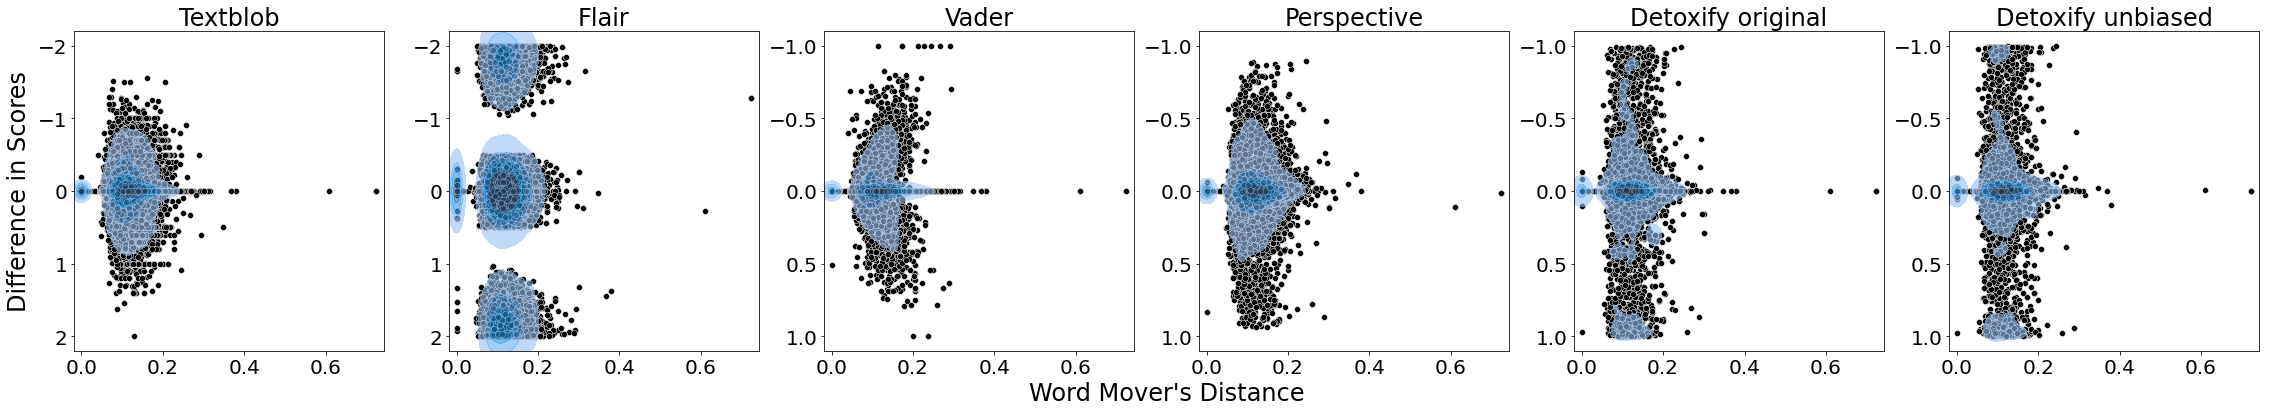

In [10]:
fig, axs = plt.subplots(1, 6, figsize=(32, 6))

for i, model in enumerate([
    "textblob",
    "flair",
    "vader",
    "perspective",
    "detoxify_original",
    "detoxify_unbiased",
]):
    df_tmp = df[["wmd", f"{model}_score_black", f"{model}_score"]].copy()
    df_tmp.loc[:, "diffs"] = df_tmp[f"{model}_score_black"] - df_tmp[f"{model}_score"]

    sns.scatterplot(
        x=df_tmp.wmd,
        y=df_tmp.diffs,
        color="k",
        ax=axs[i],
    )
    sns.kdeplot(
        x=df_tmp.wmd,
        y=df_tmp.diffs,
        levels=5,
        fill=True,
        alpha=0.6,
        cut=2,
        ax=axs[i],
    )
    axs[i].set_ylim(**lims[model])
    axs[i].set_title(model.replace('_', ' ').capitalize())
    axs[i].set(xlabel=None, ylabel=None)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='major', top=False, bottom=False, left=False, right=False)
plt.xlabel("Word Mover's Distance", fontsize=24)
plt.ylabel("Difference in Scores", fontsize=24)
plt.tight_layout(pad=0, w_pad=1)
plt.savefig(
    os.path.join(
        AbsolutePathBuilder.get_path(
            f"{dataset}_imgs",
            filepaths="../../../../config/filepaths.yaml"
        ),
        f"{dataset}_diffs_wmd.png"
    )
)
plt.show()